# Bar plots for model comparison for aDDM (Like and Dislike frame, 31 subjects)

In [1]:
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
Dislike_params = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/aDDM_simulations/Dislike_Yes_Bin_31/ParameterIterations.csv') 
Dislike_Inv_params =  pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/aDDM_simulations/Dislike_Yes_Bin_31_Inv/ParameterIterations.csv') 
Like_params =  pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/aDDM_simulations/Like_Yes_Bin_31/ParameterIterations.csv') 

## aDDM_toolbox delivers minimum negative log likelihoods (NNL) and optimal parameters.

In [13]:
Dislike_params

,Unnamed: 0,Iteration,d,sigma,theta,min_NLL
0,0,1,0.001,0.05,0.01,13363.773293
1,1,2,0.000,0.05,0.00,13342.297605


In [14]:
Dislike_Inv_params

,Unnamed: 0,Iteration,d,sigma,theta,min_NLL
0,0,1,0.001,0.05,0.01,12643.09208
1,1,2,0.001,0.05,0.00,12640.83784


In [15]:
Like_params

,Unnamed: 0,Iteration,d,sigma,theta,min_NLL
0,0,1,0.001,0.05,0.01,12442.998001
1,1,2,0.001,0.05,0.00,12441.012245


## To calculate BIC we use the equation <br>
BIC = ln(n)*k + - 2*ln(L)  <br>   
with L : maximized value of the likelihood; <br>
n : the number of data points (sample size) [ we consider this as 120*n_participants] <br>
k : the number of params for the model

In [17]:
NNL_Dislike = Dislike_params["min_NLL"].values[-1]
NNL_Dislike_Inv = Dislike_Inv_params["min_NLL"].values[-1]
NNL_Like = Like_params["min_NLL"].values[-1]

In [18]:
# Get BIC 
n = 120*33
k = 3 # params d, sigma and theta

BIC_Dislike = np.log(n)*k + 2*NNL_Dislike
BIC_Dislike_Inv = np.log(n)*k + 2*NNL_Dislike_Inv
BIC_Like = np.log(n)*k + 2*NNL_Like

In [21]:
print(BIC_Dislike)
print(BIC_Dislike_Inv)
print(BIC_Like)

28363.160608313454
27678.818947917658
27921.674898579917


In [19]:
# Load BIC score
Models_BIC = [BIC_Like, BIC_Dislike, BIC_Dislike_Inv ]
x = np.arange(len(Models_BIC))

In [20]:
Models_BIC

[24906.87648729081, 26709.447207262907, 25306.527677912745]

In [21]:
x

array([0, 1, 2])

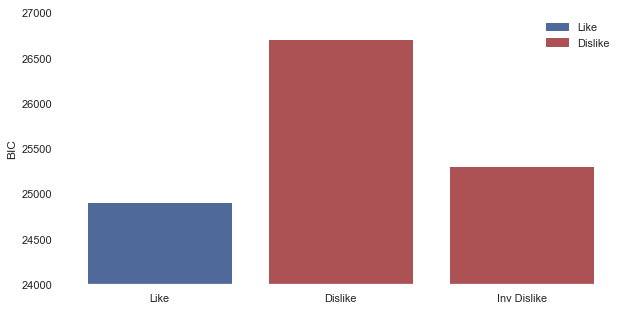

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')
plt.bar(x, Models_BIC, color=['#4F6A9A', '#AC5255', '#AC5255'])
plt.xticks(x, ('Like', 'Dislike', 'Inv Dislike'))
plt.ylim(24000, 27000)
plt.ylabel('BIC')

more_patch = mpatches.Patch(color='#4F6A9A', label='Like')
less_patch = mpatches.Patch(color='#AC5255', label='Dislike')
leg = plt.legend(handles=[more_patch,less_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)
plt.show()

fig.savefig(str('SavedFigures/aDDM_LikeDislike_ModelComparison_31.png'), dpi = 200 )

## ---[END]---